# Notchfilter

Musterlösung und zusätzliches Material zur Übung "Notchfilter".


In [1]:
import os, sys
home_dir = os.path.abspath(os.path.join('..'))
if home_dir not in sys.path:  # append directory one level up to import path
    sys.path.append(home_dir) # if it hasn't been appended already
import dsp_fpga_lib as dsp

import numpy as np
from numpy import pi, log10, sqrt, sin, cos, angle, arange
import scipy.signal as sig

%matplotlib inline
import matplotlib.pyplot as plt

 H_test  = [0.         1.82212374 1.88495559 1.94778745 3.14159265]
|H_test| = [0.         1.82212374 1.88495559 1.94778745 3.14159265]
... in dB: [      -inf 5.21155733 5.50602246 5.79083124 9.94299745]


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10


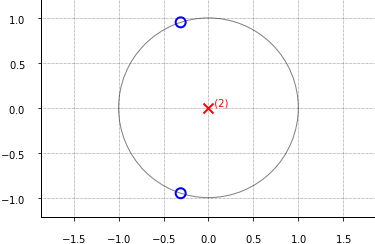

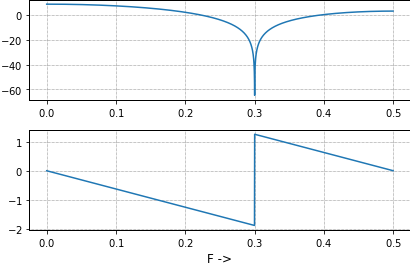

In [11]:
# Definiere Nullstellen auf EK:
N = np.asarray([np.exp(1j*0.3*2*pi), 
                np.exp(-1j*0.3*2*pi)])
P = [0]
# Verdoppele Nullstellen: 
# N = np.append(N,N)
# Pole: gleicher Winkel, kleinerer Radius:
# P = 0.95 * N
# "Ausmultiplizieren" von P/N ergibt Koeff. 
b = np.poly(N); a = np.poly(P)

fig1, ax1 = plt.subplots()
dsp.zplane(z=N,p=P, plt_ax=ax1)

fig2, (ax11, ax12) = plt.subplots(2)
# Frequenzgang an 2048 Punkten:
[W,H] = sig.freqz(b,a,2048) 
F = W / (2* pi)
ax11.plot(F, 20*log10(abs(H)))
ax12.plot(F,angle(H))
ax12.set_xlabel('F ->')
fig2.set_tight_layout(True)
# Testfreq. (normierte Kreisfreq.):
W_test = np.array([0, 0.29, 0.3, 0.31, 0.5])*2*pi
# Frequenzgang bei Testfrequenzen:
[H_test, W_test]=sig.freqz(b,a,W_test)
print(' H_test  =', H_test)
print('|H_test| =', abs(H_test))
print('... in dB:', 20*log10(abs(H_test)))

### Aufgaben
- Vergleichen Sie den Betragsgang für die verschiedenen Varianten
- Stellen Sie die Impulsantwort für verschiedene Positionen von Polen und Nullstellen dar
- Ergänzen Sie die Achsenbeschriftungen
- Entwerfen Sie ein Notchfilter für $f_{sig} = 50$ Hz und $f_S = 1$ kHz.

***
### Copyright

(c) 2016 - 2020 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2020*.